In [5]:
from functions import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn.pipeline import make_pipeline
import matplotlib.style as mplstyle
mplstyle.use(['ggplot', 'fast'])

# plt.rcParams.update({
#     "text.usetex": True,       
#     "font.family": "serif",    
#     "font.size": 10, 
# })

np.random.seed(2018)

In [7]:
polynomial_degree     = 10
n = 1000
lambda_               = 1e-5

learning_rate = 0.01
n_iterations  = 10000
tolerance     = 1e-6
use_tol       = True

train, test, full = make_data(n, 2018)

X_train = train[0].reshape(-1,1)
X_test = test[0].reshape(-1,1)
y_train = train[1]
y_test = test[1]

poly = PolynomialFeatures(degree=polynomial_degree, include_bias=False)
X_train = poly.fit_transform(x_train_scaled)#_scaled)
X_test = poly.transform(x_test_scaled)

print(X_train)

scaler = StandardScaler()
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled  = scaler.transform(X_test)

print(x_train_scaled)

TypeError: make_data() takes 1 positional argument but 2 were given

In [25]:
def gradient_descent_lasso(X, y, lmbd, learning_rate=0.0001, n_iterations=1000, tol=1e-6, use_tol=False):
    n_samples, n_features = X.shape
    theta = np.zeros(n_features)
    cost_history = []
    for i in range(n_iterations):
        gradient = lasso_gradient(X, y, theta,lmbd)
        theta -= learning_rate * gradient
        # cost is the Lasso cost function, including the regularization term
        cost = (1/n_samples) * np.sum((X @ theta - y)**2) + lmbd * np.sum(np.abs(theta))
        cost_history.append(cost)
        if use_tol and i > 0 and abs(cost_history[-2] - cost) < tol:
            print(f"Converged after {i} iterations.")
            break
    return theta, cost_history

In [33]:
theta_lasso_gd, lasso_cost_hist = gradient_descent_lasso(X_train,y_train,0.1,n_iterations = 10000)


In [34]:
y_pred_gd_lasso = X_test @ theta_lasso_gd
mse_gd_lasso    = MSE(y_test, y_pred_gd_lasso)
r2_gd_lasso     = R2(y_test, y_pred_gd_lasso)

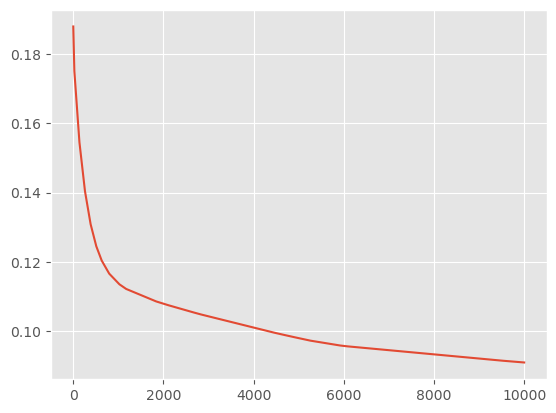

In [ ]:
plt.plot(lasso_cost_hist)
plt.title("LASSO ")